### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
suma_precio = tienda['Precio'].sum()
print(suma_precio)

1150880400.0


In [3]:
suma_precio = tienda2['Precio'].sum()
print(suma_precio)

1116343500.0


In [4]:
suma_precio = tienda3['Precio'].sum()
print(suma_precio)

1098019600.0


In [5]:
suma_precio = tienda4['Precio'].sum()
print(suma_precio)

1038375700.0


# 2. Ventas por categoría

In [7]:
tienda['tienda'] = 'tienda1'
tienda2['tienda'] = 'tienda2'
tienda3['tienda'] = 'tienda3'
tienda4['tienda'] = 'tienda4'

all_stores_df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

resultado = all_stores_df.groupby(['tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()
display(resultado)

,tienda,Categoría del Producto,Precio
0,tienda1,Artículos para el hogar,12698400.0
1,tienda1,Deportes y diversión,39290000.0
2,tienda1,Electrodomésticos,363685200.0
3,tienda1,Electrónicos,429493500.0
4,tienda1,Instrumentos musicales,91299000.0
5,tienda1,Juguetes,17995700.0
6,tienda1,Libros,8784900.0
7,tienda1,Muebles,187633700.0
8,tienda2,Artículos para el hogar,14746900.0
9,tienda2,Deportes y diversión,34744500.0


# 3. Calificación promedio de la tienda


In [9]:
resultado = all_stores_df.groupby('tienda')['Calificación'].mean().reset_index()
display(resultado)

,tienda,Calificación
0,tienda1,3.976685
1,tienda2,4.037304
2,tienda3,4.048326
3,tienda4,3.995759


# 4. Productos más y menos vendidos

In [8]:
ventas_por_producto = all_stores_df.groupby(['tienda', 'Producto'])['Precio'].sum().reset_index()

# Find the most sold product for each store
most_sold_products = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['Precio'].idxmax()]
print("Most sold products:")
display(most_sold_products)

# Find the least sold product for each store
least_sold_products = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['Precio'].idxmin()]
print("\nLeast sold products:")
display(least_sold_products)

Most sold products:


,tienda,Producto,Precio
48,tienda1,TV LED UHD 4K,142150200.0
76,tienda2,Iphone 15,113225800.0
141,tienda3,Refrigerador,99889700.0
178,tienda4,Iphone 15,96697500.0



Least sold products:


,tienda,Producto,Precio
17,tienda1,Cuerda para saltar,652800.0
67,tienda2,Cubo mágico 8x8,643600.0
118,tienda3,Cubo mágico 8x8,640400.0
170,tienda4,Cuerda para saltar,704800.0


# 5. Envío promedio por tienda

In [10]:
resultado = all_stores_df.groupby('tienda')['Costo de envío'].mean().reset_index()
display(resultado)

,tienda,Costo de envío
0,tienda1,26018.609580
1,tienda2,25216.235693
2,tienda3,24805.680373
3,tienda4,23459.457167


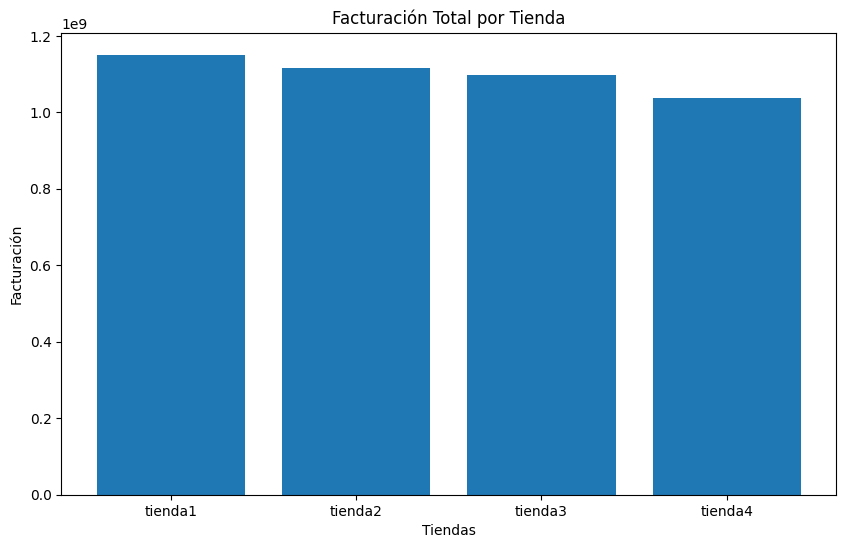

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total facturación per store
facturacion_por_tienda = all_stores_df.groupby('tienda')['Precio'].sum().reset_index()

# Crear un gráfico
plt.figure(figsize=(10, 6))
plt.bar(facturacion_por_tienda['tienda'], facturacion_por_tienda['Precio'])
plt.title('Facturación Total por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.show()

Conclusion: Basándonos en este análisis exhaustivo, recomiendo que el señor Juan considere vender la tienda 4 . Su bajo desempeño en facturación, la insatisfacción de los clientes y la falta de interés en sus productos sugieren que no es una inversión viable para el futuro